In [1]:
##Generator which accepts single number and outputs image corresponding to the input

In [2]:
#create dataloaders
from random import randint as ri
import torch as torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('zero', 'one', 'two', 'three',
           'four', 'five', 'six', 'seven', 'eight', 'nine')

In [3]:
#check if data is loaded properly
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('      %4s' % classes[labels[j]] for j in range(4)))

<Figure size 640x480 with 1 Axes>

      seven       seven       five       nine


In [4]:
#Create a class for model 
import torch.nn as nn
import torch.nn.functional as F


class Generator(nn.Module):
    def __init__(self):
        
        super(Generator, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = (7), stride=1, padding = 30),      #Apply a convolution block
            nn.ReLU(),
            nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = (2), stride=1, padding = 1),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
        )
        
    def forward(self, x):
        x = self.block(x);
        
        return x


input Shape: torch.Size([1, 1, 1, 1])  value = tensor([[[3.]]]) 


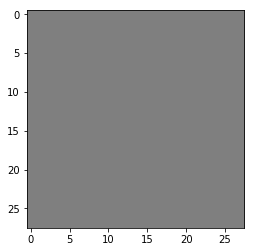

torch.Size([1, 1, 28, 28])

In [5]:
#Create an instance of the generator model
gen = Generator()
input_noise = torch.randn((1,1,1,1))
input_noise[0] = ri(0,9)
print("input Shape: {}  value = {} ".format(input_noise.shape,input_noise[0]))


op = gen(input_noise)
#op.shapeimages.shape
#print("Output Shape: {}".format(op.shape))

imshow(torchvision.utils.make_grid(op[0,0,:,:]))
op.shape

In [6]:
#create optimization function and loss function
import torch.optim as optim

criterion = nn.BCELoss()
generator_optimizer = optim.Adam(gen.parameters(), lr=0.00005)

In [7]:
ip = torch.randn((4,1,1,1))

In [8]:
#loop over the dataset multiple times
for epoch in range(1):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        images, labels = data
        ip[:,0,0,0] = labels;
        #labels = labels.view((1,1,1,1))
        # zero the parameter gradients
        generator_optimizer.zero_grad()

        # forward + backward + optimize
        op_images = gen(ip)
        
        loss = criterion(op_images, images)
        loss.backward()
        generator_optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[Epoch: %d, No of images: %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[Epoch: 1, No of images:  2000] loss: -20.423
[Epoch: 1, No of images:  4000] loss: -20.405
[Epoch: 1, No of images:  6000] loss: -20.455
[Epoch: 1, No of images:  8000] loss: -20.416
[Epoch: 1, No of images: 10000] loss: -20.378
[Epoch: 1, No of images: 12000] loss: -20.428
[Epoch: 1, No of images: 14000] loss: -20.402
Finished Training


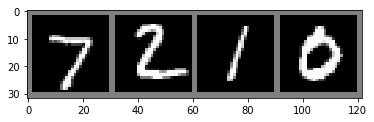

GroundTruth:  seven   two   one  zero


In [14]:
#validate over test set
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

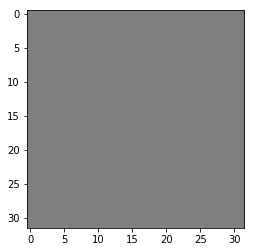

In [19]:
imshow(torchvision.utils.make_grid(gen(torch.randn(1,1,10,10))))

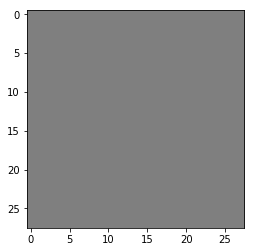

In [10]:
a = torch.ones((1,1,1,1))
a[0,0,0,0] = torch.randn(1)
imshow(torchvision.utils.make_grid(gen(a)))

In [11]:
import torchvision.models as models
alexnet = models.alexnet()
alexnet.features
weights1 = alexnet.features[0].weight
npweights1 = weights1.data.numpy()

In [12]:
npweights1

array([[[[ 4.75027189e-02, -3.45840156e-02,  2.38446221e-02, ...,
           1.36045367e-03,  3.31557021e-02, -2.05443054e-02],
         [ 2.75276452e-02, -2.25603785e-02,  1.36757717e-02, ...,
           6.93794340e-03, -1.45144016e-02, -3.96530777e-02],
         [ 2.93959454e-02, -9.30858776e-03,  5.34594804e-03, ...,
           3.19790244e-02, -1.21855959e-02,  1.44523233e-02],
         ...,
         [ 3.36138532e-02, -1.68929435e-02, -4.63738143e-02, ...,
           2.19492614e-02,  3.47364917e-02,  9.77336615e-03],
         [ 1.84784755e-02,  4.57666814e-02, -2.04158463e-02, ...,
           1.51182190e-02, -3.19240168e-02,  4.23924625e-03],
         [ 4.86338958e-02,  3.10959667e-02,  3.97138298e-03, ...,
           7.13079423e-03,  4.85138744e-02,  6.33684173e-03]],

        [[-3.83098423e-03, -2.50306278e-02,  2.43682414e-02, ...,
           5.12417331e-02,  1.77870616e-02, -2.67846454e-02],
         [-4.97239344e-02, -1.50622763e-02,  1.10547617e-03, ...,
          -9.74207744e

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

NameError: name 'outputs' is not defined

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = gen(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))